In [1]:
import pandas as pd
#from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Model
from keras.utils import to_categorical
from sklearn.metrics import classification_report
#from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [2]:
data = pd.read_csv('/content/drive/My Drive/icml_face_data.csv')

In [3]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [5]:
pixel_data = data[' pixels']
label_data = data['emotion']


In [6]:
len(label_data)

35887

In [7]:
def preprocess_pixels(pixel_data):
  images = []
  for i in range(len(pixel_data)):
    img = np.fromstring(pixel_data[i], dtype='int', sep=' ')
    img = img.reshape(48,48,1)
    images.append(img)

  X = np.array(images)

 

  return X

In [8]:
oversampler = RandomOverSampler(sampling_strategy='auto')

X_over, Y_over = oversampler.fit_resample(pixel_data.values.reshape(-1,1), label_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
X_over_series = pd.Series(X_over.flatten())
X_over_series

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    24 16 22 37 54 59 38 42 37 38 52 56 48 55 62 8...
62919    34 30 57 76 81 85 85 77 86 97 119 129 114 78 4...
62920    211 218 220 174 96 64 35 37 56 60 75 105 145 1...
62921    135 119 98 77 77 111 123 120 110 100 110 119 1...
62922    56 49 49 70 127 166 218 237 232 225 219 208 20...
Length: 62923, dtype: object

In [10]:
X = preprocess_pixels(X_over_series)
Y = Y_over

In [11]:
Y = Y_over.reshape(Y.shape[0],1)
Y.shape

(62923, 1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 45)

In [2]:
def emotion_recognition(input_shape):

  X_input = Input(input_shape)

  X = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid')(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = Conv2D(64, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = MaxPooling2D((2,2))(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

 

  X = MaxPooling2D((2,2))(X)
  X = Flatten()(X)
  X = Dense(200, activation='relu')(X)
  X = Dropout(0.6)(X)
  X = Dense(7, activation = 'softmax')(X)

  model = Model(inputs=X_input, outputs=X)

  return model










In [3]:
model = emotion_recognition((48,48,1))


In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 64)       

In [5]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
y_train = to_categorical(Y_train, num_classes=7)

In [59]:
y_train.shape

(56630, 7)

In [60]:
y_test = to_categorical(Y_test, num_classes=7)

In [61]:
model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
1770/1770 [==============================] - 15s 8ms/step - loss: 1.7400 - accuracy: 0.3192 - val_loss: 1.4203 - val_accuracy: 0.4715
Epoch 2/30
1770/1770 [==============================] - 15s 8ms/step - loss: 1.3774 - accuracy: 0.4722 - val_loss: 1.2002 - val_accuracy: 0.5547
Epoch 3/30
1770/1770 [==============================] - 15s 8ms/step - loss: 1.1989 - accuracy: 0.5409 - val_loss: 1.0786 - val_accuracy: 0.5800
Epoch 4/30
1770/1770 [==============================] - 15s 8ms/step - loss: 1.0859 - accuracy: 0.5845 - val_loss: 0.9894 - val_accuracy: 0.6272
Epoch 5/30
1770/1770 [==============================] - 15s 8ms/step - loss: 0.9899 - accuracy: 0.6244 - val_loss: 0.9303 - val_accuracy: 0.6564
Epoch 6/30
1770/1770 [==============================] - 15s 8ms/step - loss: 0.9187 - accuracy: 0.6512 - val_loss: 0.9022 - val_accuracy: 0.6638
Epoch 7/30
1770/1770 [==============================] - 15s 8ms/step - loss: 0.8476 - accuracy: 0.6815 - val_loss: 0.8334 - val_ac

In [62]:
model.save_weights('/content/drive/My Drive/emotion_weights_3.hdf5')

In [63]:
model.evaluate(X_test, y_test)

197/197 [==============================] - 1s 4ms/step - loss: 0.8396 - accuracy: 0.8281


[0.8395584225654602, 0.8280629515647888]

In [64]:
preds = model.predict(X_train)

In [82]:
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))

  for i in range(len(preds)):
   pred_class[i] = np.argmax(preds[i])

  return pred_class

In [83]:
pred_class_train = get_class(preds)

In [85]:
train_report = classification_report(Y_train, pred_class_train)


In [87]:
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8054
           1       1.00      1.00      1.00      8094
           2       0.99      0.98      0.98      8109
           3       1.00      0.99      0.99      8083
           4       0.98      0.98      0.98      8101
           5       0.99      0.99      0.99      8120
           6       0.98      0.99      0.99      8069

    accuracy                           0.99     56630
   macro avg       0.99      0.99      0.99     56630
weighted avg       0.99      0.99      0.99     56630



In [88]:
test_preds = model.predict(X_test)

In [89]:
len(test_preds)

6293

In [90]:
pred_test_class = get_class(test_preds)


In [91]:
report_test = classification_report(Y_test, pred_test_class)

In [92]:
print(report_test)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       935
           1       0.99      1.00      1.00       895
           2       0.83      0.81      0.82       880
           3       0.84      0.72      0.78       906
           4       0.70      0.76      0.73       888
           5       0.91      0.94      0.92       869
           6       0.72      0.77      0.74       920

    accuracy                           0.83      6293
   macro avg       0.83      0.83      0.83      6293
weighted avg       0.83      0.83      0.83      6293



In [6]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
label_dict

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happiness',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

In [102]:
img_path = 'test1_happiness.jpeg'
img = image.load_img(img_path, grayscale=True, target_size=(48,48))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [103]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape

(1, 48, 48, 1)

The predicted emotion is : Happiness


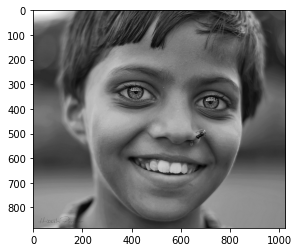

In [104]:
prediction = np.argmax(model.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

In [7]:
model.load_weights('C:\\Users\\ketan\\Desktop\\Machine Learning\\Facial Expression\\emotion_weights_3.hdf5')

In [8]:
face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\ketan\\Desktop\\Machine Learning\\Facial Expression\\archive\\haarcascade_frontalface_default.xml')



In [ ]:
cap = cv2.VideoCapture(0)

while True:
 
 _,cap_image = cap.read()




 cap_img_gray = cv2.cvtColor(cap_image, cv2.COLOR_BGR2GRAY)

 faces = face_haar_cascade.detectMultiScale(cap_img_gray, 1.3, 5)

 for (x,y,w,h) in faces:

   cv2.rectangle(cap_image, (x,y), (x+w,y+h),(255,0,0),2)
   roi_gray = cap_img_gray[y:y+h, x:x+w]
   roi_gray = cv2.resize(roi_gray, (48,48))
   img_pixels = image.img_to_array(roi_gray)
   img_pixels = np.expand_dims(img_pixels, axis=0)

   predictions = model.predict(img_pixels)
   emotion_label = np.argmax(predictions)

   emotion_prediction = label_dict[emotion_label]

   cv2.putText(cap_image, emotion_prediction, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1 )

   resize_image = cv2.resize(cap_image, (1000,700))
   cv2.imshow('Emotion',resize_image)

   if cv2.waitKey(10) == ord('b'):
    break
  
cap.release()
cv2.destroyAllWindows 
